In [0]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 10 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 6s (53.2 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131322 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Prepar

In [0]:
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
 

    100% |████████████████████████████████| 132.4MB 150kB/s 
    100% |████████████████████████████████| 2.8MB 7.7MB/s 
    100% |████████████████████████████████| 225kB 16.3MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-_lumkaj4/wheels/6c/c2/bd/d6fb8f2660e0591d357352aba1b117b3211d016994d933d792
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyproj pyshp


['Country', 'Name', 'Lat', 'Long', 'Diameterkm', 'Age, Ma', 'V', 'Type', 'Depth, m', 'N', 'Erosion', 'Appearance', 'Space view', 'Rocks']
['Afghanistan', 'unnamed_Afghanistan1', 35.02, 65.085, 16.0, '', 2.0, '', '', 1.0, '', 'structure', 'Y', 'cry']
['Afghanistan', 'unnamed_Afghanistan2', 34.879, 65.354, 16.0, '', 1.0, '', '', 1.0, '', 'structure', 'Y', 'cry']
['Afghanistan', 'Lakhcak', 32.0203, 65.3599, 5.32, '', 2.0, '', 800.0, 1.0, '', 'depression', 'Y', '']
['Algeria', 'Eheri', 22.8833, 4.45, 2.7, '', 2.0, '', '', 2.0, '', 'structure', 'Y', '']
['Algeria', 'Aflou', 34.0, 2.045, 5.0, 100.0, 0.0, 'S', '', 1.0, '', 'depression', 'Excellent', '']
['Algeria', 'unnamed_Algeria', 25.856, 0.582, 6.5, '', 1.0, '', '', 1.0, '', 'depression', 'Y', '']
['Algeria', 'Foum Teguentour', 26.25, 2.95, 8.0, '', 0.0, 'R', '', 1.0, '', 'structure', 'Y', '']
['Algeria', 'Guerrara', 33.5, 5.333, '', '', 2.0, '', '', 12.0, '', '', 'N', '']
['Algeria', 'Amguid', 26.0873, 4.395, 0.45, 0.1, 4.0, 'S', 30.0, 1

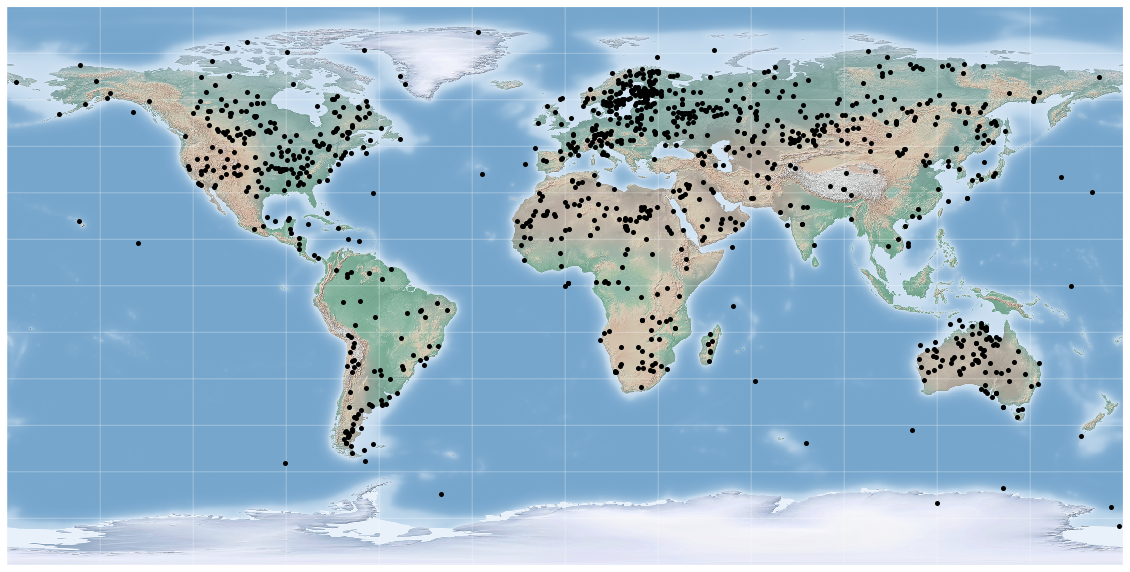

In [5]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(20, 20), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

import xlrd
workbook = xlrd.open_workbook("/asteroids1.xlsx")
sheet = workbook.sheet_by_index(0)

for rowx in range(sheet.nrows):
    cols = sheet.row_values(rowx)
    print(cols)
    # Map (long, lat) to (x, y) for plotting
    x, y = m(cols[3], cols[2])
    plt.plot(x, y, 'ok', markersize=5)
